In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [185]:
cars = pd.read_csv('car_evaluation.csv')

In [186]:
cars

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [187]:
### EAD Activities
cars.shape

(1728, 7)

In [188]:
cars.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [189]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [190]:
cars.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

<AxesSubplot:>

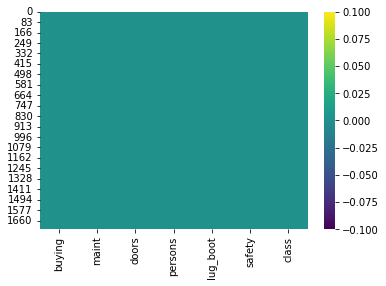

In [191]:
sns.heatmap(cars.isna(),cmap = 'viridis')

##### No Null Values

In [192]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,small,high,unacc
freq,432,432,432,576,576,576,1210


#### Checking the unique values and unique no records in each column as columns are categorical.

In [193]:
for i in cars.columns:
    print(cars[i].unique(),'\t', cars[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


#### So come columns has four no of unique records and some has three no of unique records.

##### 1.Checking the value counts for each unique records of each column for predicting the condition the vehicle based on its unique features

In [194]:
for i in cars.columns:
    print(cars[i].value_counts())

high     432
low      432
vhigh    432
med      432
Name: buying, dtype: int64
high     432
low      432
vhigh    432
med      432
Name: maint, dtype: int64
2        432
5more    432
3        432
4        432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
small    576
big      576
med      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


#### Here Class has unacc : Unacceptable(1210) , acc : acceptable(384) , good : good condition(69) , v good : very good condition(65)

#### Based on the class feature condition of vechile is like that : Unacceptable -- 1210 , Acceptable --- 384 , Good Condition -- 69 , Very Good Condition --- 65

#### Plotting and predicting  the conditin of a vehicle based on the class feature as all other features are balanced but class feature is unbalanced

<AxesSubplot:>

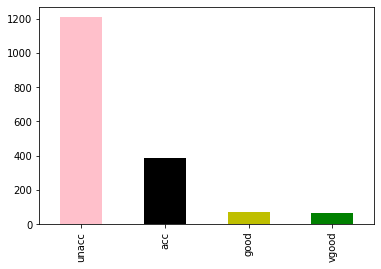

In [195]:
cars['class'].value_counts().plot(kind='bar',color=['pink','black','y','g'])

### 

#### Checking the correlatin matrix among features  for that there is object datatypes in the dataset which is need to convert into numeric so used the label encoder for that to create the dummy variables.


In [196]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [197]:
## fitting the label encoder in all columns so defining the for loop for that.

for i in cars.columns:
    cars[i] = lc.fit_transform(cars[i])

In [198]:
cars

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


### So we convert the categorical column into numeric by creating the dummies

In [199]:
## Checking the correlatin matrix of the features.

cars.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


<AxesSubplot:>

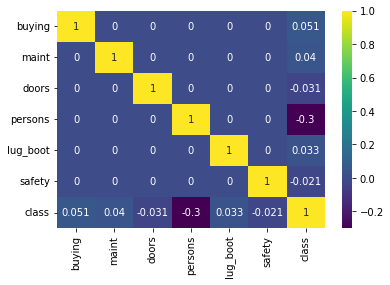

In [200]:
sns.heatmap(cars.corr(),annot=True,cmap = 'viridis')

In [201]:
cars.corr().sort_values(by = 'class',ascending=False)

,buying,maint,doors,persons,lug_boot,safety,class
class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468


<AxesSubplot:>

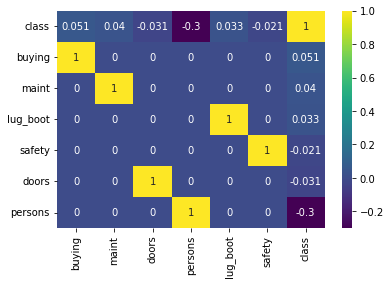

In [202]:
sns.heatmap(cars.corr().sort_values(by = 'class',ascending=False),annot=True,cmap='viridis')

#### So buying , maint , lug_boot has positive correlation with class and safety , doors , persons has negative correlation with class

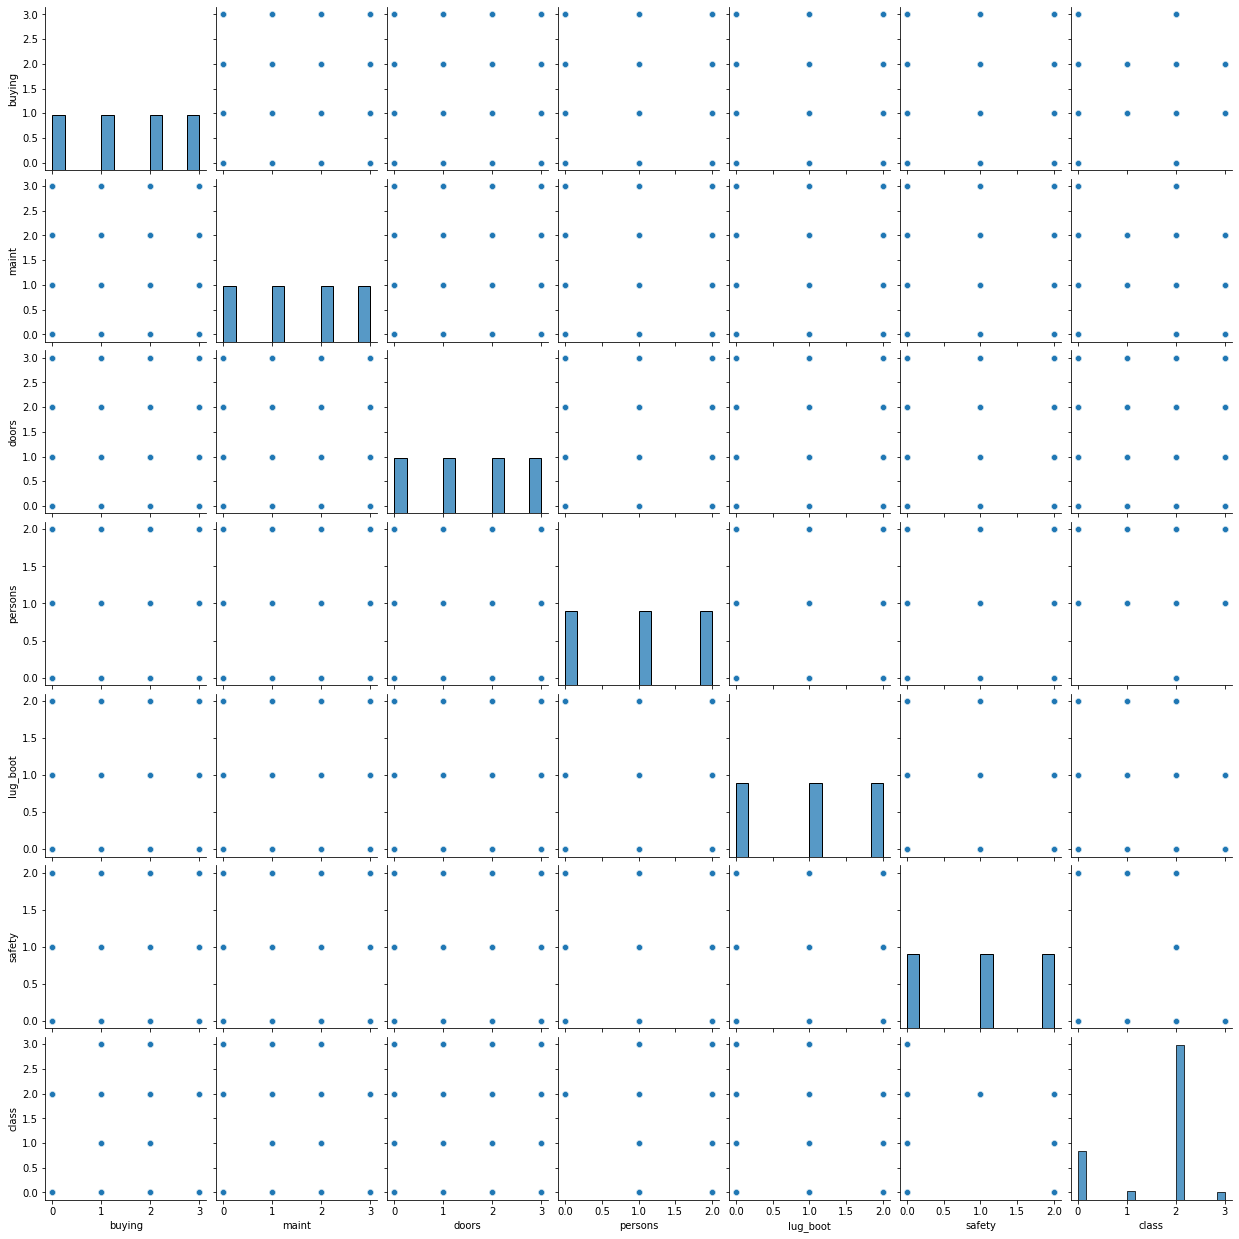

In [203]:
### Plotting the pair plot for checking the correlatin graph.
sns.pairplot(data=cars,kind='scatter')

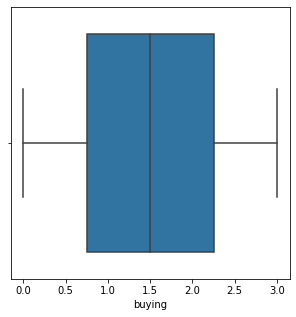

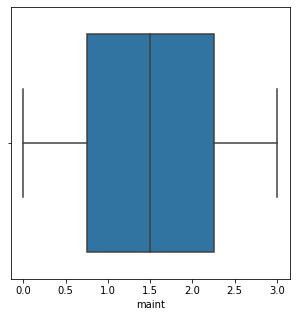

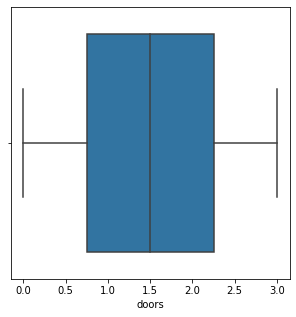

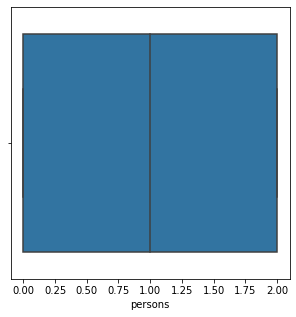

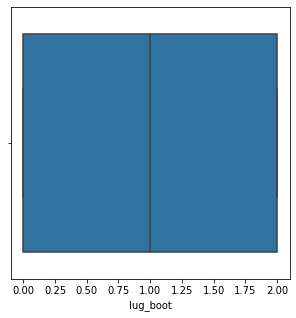

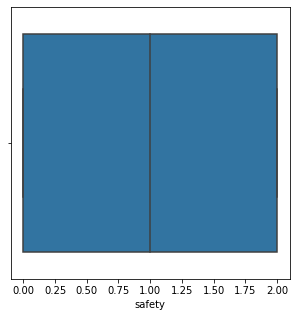

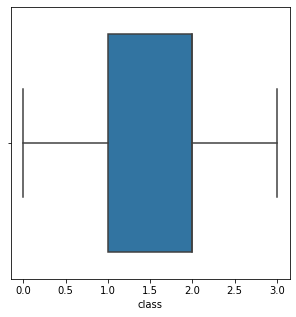

In [204]:
## CHecking the outliers.
for i in cars.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=i,data=cars)

### no outliers are present

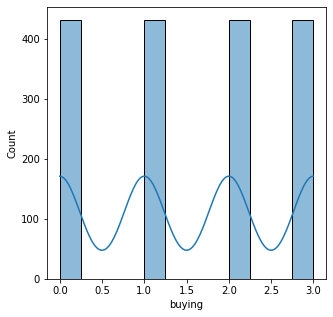

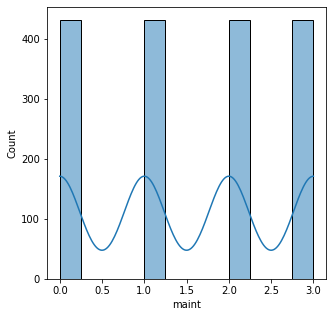

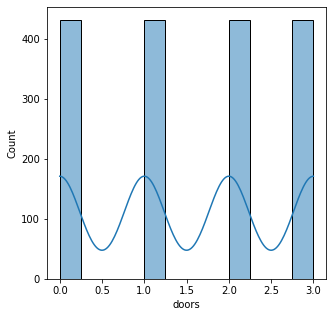

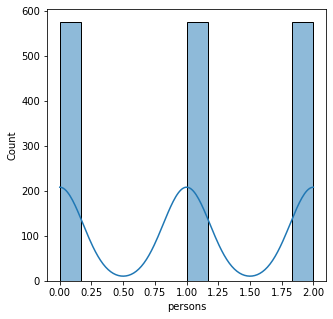

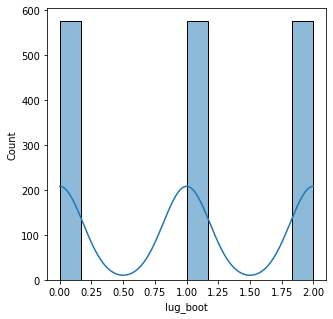

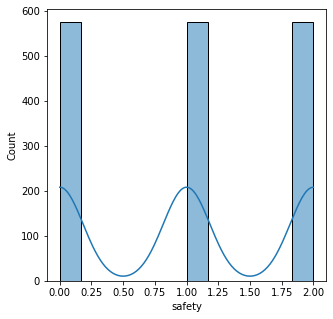

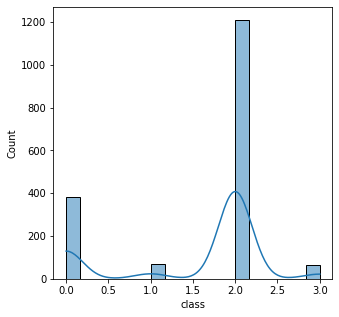

In [205]:
## Checking the distribution of the data using the histogram.

for i in cars.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(x=i,data=cars,kde=True)

#### By histogram we can clearly see that the all the feature are balanced and class is left skewed where mean<median or can say unbalanced

### 

#### Plotting and predicting  the conditin of a vehicle based on the class feature as all other features are balanced but class feature is unbalanced

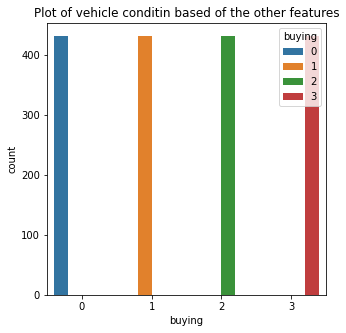

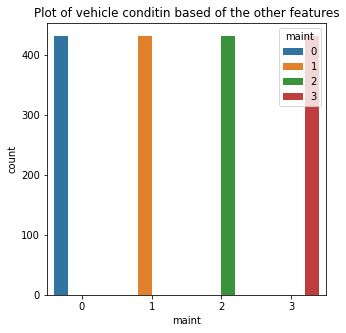

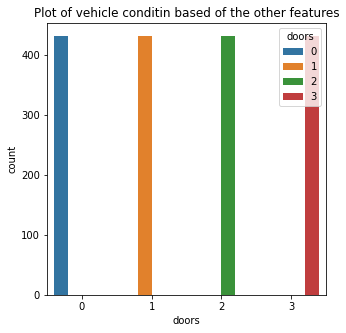

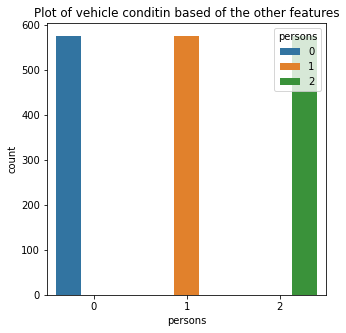

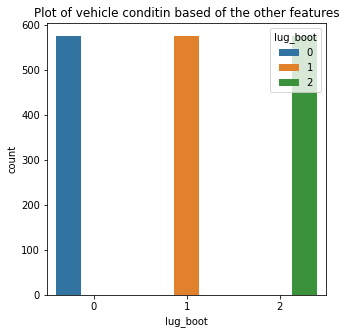

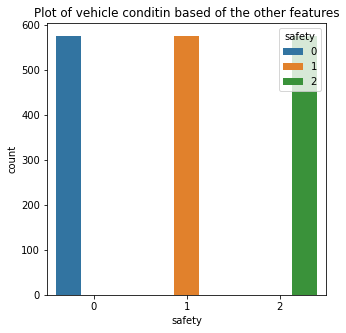

In [206]:
## Now plotting the conditiin of the vehicle based on the other features.
cars_cond_features = cars[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
for i in cars_cond_features.columns:
        plt.figure(figsize=(5,5))
        plt.title('Plot of vehicle conditin based of the other features')
        plt.xlabel('Condition')
        plt.ylabel('No of Counts')
        sns.countplot(cars[i] , hue = cars_cond_features[i] , )
        #cars[i].value_counts().plot(kind='bar',color = 'pink',legend=True)

##### Since the conditin of vehicle is same with all the other feature other than class feature in terms of maintenance , safety , buying , doors and lut_boot in terms of  high , very high , med , small , big , more

### 

### Train multiple classifiers and compare the accuracy.

In [207]:
## Importing the libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , f1_score

In [208]:
## Splitting the data into train and test dataset.
X = cars.iloc[:,0:6].values

In [209]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [210]:
y = cars.iloc[:,[-1]].values
y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [3]])

##### Splitting the dataset and converting them into array 

In [211]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [212]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1209, 6) (519, 6) (1209, 1) (519, 1)


##### Since the algorithim we are using is not distance based algorithim so standard scaling is not required.

In [213]:
logreg = LogisticRegression(solver = 'newton-cg',multi_class = 'multinomial')
logreg

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [214]:
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [215]:
pred = logreg.predict(X_test)

In [216]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [217]:
## Acuracy of the logistic regression.

Accuracy = accuracy_score(y_test,pred)
Accuracy

0.6647398843930635

In [218]:
logreg1 = LogisticRegression(solver = 'lbfgs',multi_class = 'multinomial')
logreg1

LogisticRegression(multi_class='multinomial')

In [219]:
logreg1.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [220]:
logreg1_pred = logreg1.predict(X_test)
logreg1_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [221]:
Accuracy_logreg1 = accuracy_score(y_test,logreg1_pred)

In [222]:
Accuracy_logreg1

0.6647398843930635

#### In both method we got the same accuracy in logistic regression

In [223]:
### Confusion matrix.
confusion_matrix(y_test,pred)

array([[ 21,   0,  92,   5],
       [  3,   0,  16,   0],
       [ 34,   0, 323,   1],
       [ 12,   0,  11,   1]])

In [224]:
## printing the classification report.

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.30      0.18      0.22       118
           1       0.00      0.00      0.00        19
           2       0.73      0.90      0.81       358
           3       0.14      0.04      0.06        24

    accuracy                           0.66       519
   macro avg       0.29      0.28      0.27       519
weighted avg       0.58      0.66      0.61       519



##### We can get the precision and recall for 0,1,2,3 for each feature of the dataset and accuracy 66%

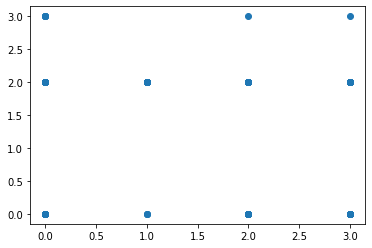

In [225]:
### Checking the accuray score of the training data.
plt.scatter(y_test,pred)

In [226]:
### As logistic regression has output probablistic so checking the probablity of logicsitc regression.
logreg.fit(X_train,y_train)
logreg.predict_proba(X_test)

array([[1.53334446e-01, 2.38473608e-02, 7.81522265e-01, 4.12959281e-02],
       [1.02111634e-01, 3.89101874e-02, 8.58922239e-01, 5.59399023e-05],
       [1.35907183e-01, 3.89035100e-02, 8.24783389e-01, 4.05917654e-04],
       ...,
       [2.26656509e-01, 2.54943772e-02, 6.15464371e-01, 1.32384743e-01],
       [2.50515756e-01, 8.88698396e-02, 6.60562047e-01, 5.23572821e-05],
       [2.17366615e-01, 5.11456013e-02, 7.31322157e-01, 1.65626577e-04]])

#### Got the probablistic prediction from logistic regression 

#### Accuracy Using KNN Classifier

In [275]:
knn = KNeighborsClassifier(n_neighbors = 6, n_jobs = -1)   # Initialize the algorithim

In [276]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6)

In [277]:
y_pred = knn.predict(X_test)

In [278]:
y_pred

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1,
       3, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [279]:
Accuracy_knn = accuracy_score(y_test,y_pred)
Accuracy_knn

0.9171483622350675

In [280]:
### Confusion matrix.
confusion_matrix(y_test,y_pred)

array([[ 94,   2,  21,   1],
       [  6,  12,   0,   1],
       [  8,   0, 350,   0],
       [  3,   0,   1,  20]])

In [281]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       118
           1       0.86      0.63      0.73        19
           2       0.94      0.98      0.96       358
           3       0.91      0.83      0.87        24

    accuracy                           0.92       519
   macro avg       0.89      0.81      0.84       519
weighted avg       0.91      0.92      0.91       519



#### Now USing Cross Validation for KNN for optimum no of neighbors and best metric for better the model to perform.

In [244]:
from sklearn.model_selection import cross_val_score , learning_curve , KFold

In [269]:
avg_score = []
for k in range(2,30):
    knn = KNeighborsClassifier(n_jobs = -1 , n_neighbors = k)
    cv = KFold(n_splits = 10 ,random_state = 1 , shuffle = True)
    knn_score = cross_val_score(knn,X_train,y_train,cv=cv,scoring='accuracy')
    avg_score.append(knn_score.mean())

In [270]:
avg_score

[0.7659641873278237,
 0.8528030303030304,
 0.868526170798898,
 0.8957988980716254,
 0.9049035812672177,
 0.8925137741046832,
 0.887534435261708,
 0.861900826446281,
 0.8577617079889809,
 0.8528030303030304,
 0.8445523415977961,
 0.8354476584022038,
 0.8246831955922864,
 0.8238567493112947,
 0.8263429752066116,
 0.8188911845730027,
 0.8164118457300275,
 0.8122796143250689,
 0.8006955922865012,
 0.7998760330578512,
 0.8056611570247935,
 0.7940771349862259,
 0.7874724517906336,
 0.785805785123967,
 0.7866322314049586,
 0.7808471074380166,
 0.7725895316804408,
 0.770103305785124]

([<matplotlib.axis.XTick at 0x7ff77212b090>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

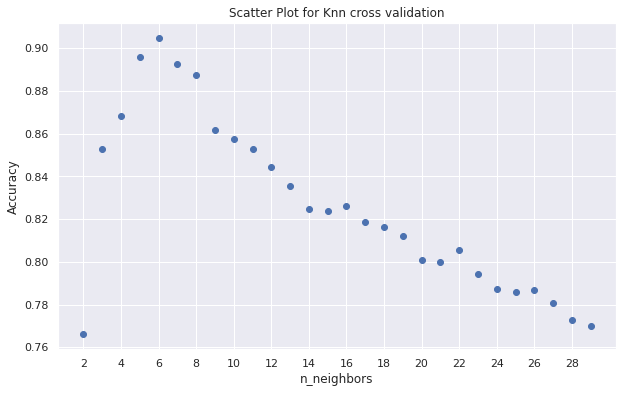

In [300]:
## Plotting the Knn cross validatin curve for get the optimum paramters for better accuracy.
sns.set(rc={'figure.figsize':(10,6)})
plt.scatter(range(2,30),avg_score)
plt.title('Scatter Plot for Knn cross validation')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
sns.set_style('whitegrid')
plt.xticks(range(2,30,2))

#### so at n_neigbors 6 we get the knn got the maximum accuracy of 92 % and also get the best f1 score for the data.

#### So KNN algorithim got the achieve the accuracy of 92%

### 

#### Random Forest Classifier 

In [409]:
rfc = RandomForestClassifier(n_estimators = 100,n_jobs = -1,max_depth = 10 , min_samples_split = 3 , criterion = 'entropy' ,random_state = 0)

In [410]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_jobs=-1, random_state=0)

In [411]:
rfc_pred = rfc.predict(X_test)

In [412]:
rfc_pred

array([2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [413]:
Accuracy_rfc = accuracy_score(y_test,rfc_pred)*100
Accuracy_rfc

95.95375722543352

In [414]:
f1_score(y_test,rfc_pred,average = 'micro')

0.9595375722543352

In [415]:
f1_score(y_test,rfc_pred,average = 'macro')

0.878229748734906

In [416]:
f1_score(y_test,rfc_pred,average = 'weighted')

0.9610402766623307

In [417]:
## Confusion Matrix 

confusion_matrix(y_test,rfc_pred)

array([[106,  10,   1,   1],
       [  2,  16,   0,   1],
       [  3,   0, 355,   0],
       [  3,   0,   0,  21]])

In [418]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       118
           1       0.62      0.84      0.71        19
           2       1.00      0.99      0.99       358
           3       0.91      0.88      0.89        24

    accuracy                           0.96       519
   macro avg       0.86      0.90      0.88       519
weighted avg       0.96      0.96      0.96       519



In [419]:
### Cross validatin of Random forest Classifier

pgrid = {'n_estimators' : [5,15,30,50,100] , 'criterion' : ['gini','entropy'] , 'max_depth' : [2,5,7,10] , 'min_samples_split' : [3,5,10,15] }

In [420]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator = rfc , param_grid = pgrid ,cv = 5, scoring = 'accuracy' , n_jobs = -1)

In [421]:
gridsearch

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=3, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 10],
                         'min_samples_split': [3, 5, 10, 15],
                         'n_estimators': [5, 15, 30, 50, 100]},
             scoring='accuracy')

In [422]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=3, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 10],
                         'min_samples_split': [3, 5, 10, 15],
                         'n_estimators': [5, 15, 30, 50, 100]},
             scoring='accuracy')

In [423]:
gridsearch_pred = gridsearch.predict(X_test)
gridsearch_pred

array([2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [424]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 3,
 'n_estimators': 100}

#### So Random Foreset got the accuracy of 95.95% and f1 score is 88% in macro after get the optimum parameter from  Grid search CV 

### 

#### Decision Tree Classifier

In [426]:
from sklearn.tree import DecisionTreeClassifier


In [428]:
dt = DecisionTreeClassifier()

In [430]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [432]:
dt.predict(X_test)

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [433]:
accuracy_score(y_test,dt.predict(X_test))

0.9710982658959537

In [434]:
dt.score(X_test,y_test)

0.9710982658959537

In [436]:
f1_score(y_test,dt.predict(X_test),average = 'macro')

0.9250597184243778

### 

### Now using the xgboost and compare the model performance and accuracy

In [437]:
from xgboost import XGBClassifier

In [474]:
xgb = XGBClassifier(n_estimators = 28 , n_jobs = -1 , random_state = 1)

In [475]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=28, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [476]:
xgb_pred = xgb.predict(X_test)

In [477]:
xgb_pred

array([2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [478]:
print(xgb.score(X_test,y_test))
print('xgb_Accuracy :' , accuracy_score(y_test,xgb_pred))

0.976878612716763
xgb_Accuracy : 0.976878612716763


In [479]:
## XG Boost Confusion matrix.

confusion_matrix(y_test,xgb_pred)

array([[110,   7,   0,   1],
       [  1,  17,   0,   1],
       [  1,   0, 357,   0],
       [  1,   0,   0,  23]])

In [480]:
### Classification Report XGBoost.

print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       118
           1       0.71      0.89      0.79        19
           2       1.00      1.00      1.00       358
           3       0.92      0.96      0.94        24

    accuracy                           0.98       519
   macro avg       0.90      0.95      0.92       519
weighted avg       0.98      0.98      0.98       519



In [473]:
### KFold cross validation for the model.
avg_score_xgb = []
for i in range(2,30):
    xgb_model = XGBClassifier(n_estimators = i , random_state = 7)
    kfold = KFold(n_splits = 10 , random_state = 7 , shuffle = True)
    score_xgb = cross_val_score(xgb_model , X_train , y_train , cv = kfold,scoring = 'accuracy')
    avg_score_xgb.append(score_xgb.mean())

In [454]:
avg_score_xgb

[0.9023484848484848,
 0.9197107438016529,
 0.9205371900826446,
 0.9246763085399449,
 0.9279889807162535,
 0.9395592286501377,
 0.9461845730027548,
 0.9503305785123967,
 0.9519903581267217,
 0.9511707988980715,
 0.9536570247933884,
 0.9553030303030303,
 0.9586225895316804,
 0.9594490358126722,
 0.9627548209366392,
 0.9652410468319561,
 0.9652410468319561,
 0.9693732782369147,
 0.9710261707988981,
 0.9735123966942147,
 0.9751721763085401,
 0.9776515151515153,
 0.9793044077134987,
 0.9817975206611569,
 0.9834504132231405,
 0.9851101928374655,
 0.9851101928374655,
 0.9851101928374655]

([<matplotlib.axis.XTick at 0x7ff771fb0fd0>,
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

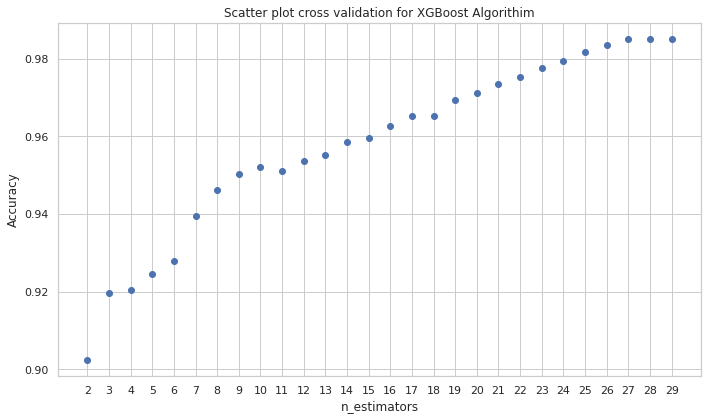

In [458]:
plt.scatter(range(2,30),avg_score_xgb)
plt.title('Scatter plot cross validation for XGBoost Algorithim')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.xticks(range(2,30,1))

### so XGBClassifier algorithim gives accuracy of 98 % at n_estimators = 28

In [495]:
Accuracy = pd.DataFrame({'Logestic Reg' : Accuracy , 'KNeighbors' : Accuracy_knn , 'RandomForest' : Accuracy_rfc, 'DecisionTree' : accuracy_score(y_test,dt.predict(X_test)) , 'XGBoost': accuracy_score(y_test,xgb_pred) },index = ['Accuracy_Models'])

In [500]:
Accuracy.T

,Accuracy_Models
Logestic Reg,0.664740
KNeighbors,0.917148
RandomForest,95.953757
DecisionTree,0.971098
XGBoost,0.976879


### So we get the XGBoost that has highest accuracy 98% and Logistic Regression has least accuracy of 66%

##### END